In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [52]:
#Importing data file
link = 'C:/Users/CLINTON/Documents/GAMES Internship/Hamoye/Data_for_UCI_named.csv'
df = pd.read_csv(link)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


### Data Cleaning

In [7]:
df.shape

(10000, 14)

In [8]:
#Checking for Missing data
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [9]:
#Checking for Outliners
df[['tau1','tau2','tau3','tau4']].min()

tau1    0.500793
tau2    0.500141
tau3    0.500788
tau4    0.500473
dtype: float64

In [10]:
df[['tau1','tau2','tau3','tau4']].max()

tau1    9.999469
tau2    9.999837
tau3    9.999450
tau4    9.999443
dtype: float64

tau1 to tau4 ranges from 0.5 to 10 from the data description, therefore there are no outliners in the columns

In [11]:
df[['p2','p3','p4']].min()

p2   -1.999891
p3   -1.999945
p4   -1.999926
dtype: float64

In [12]:
df[['p2','p3','p4']].max()

p2   -0.500108
p3   -0.500072
p4   -0.500025
dtype: float64

p2 to p4 ranges from -2.0 to -0.5 from the data description, therefore there are no outliner


In [13]:
df[['g1','g2','g3','g4']].min()


g1    0.050009
g2    0.050053
g3    0.050054
g4    0.050028
dtype: float64

In [14]:
df[['g1','g2','g3','g4']].max()

g1    0.999937
g2    0.999944
g3    0.999982
g4    0.999930
dtype: float64

No outliners found

In [15]:
#dropping the column stab
df.drop('stab', axis =1, inplace = True)

### Feature Engineering

In [16]:
#Encoding Target Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['stabf'] = le.fit_transform(df.stabf)
df['stabf'].sample(5)

3043    1
8280    1
7593    0
1454    0
5263    0
Name: stabf, dtype: int32

In [17]:
#Columns correlayion with stabf
Correlation_Matrix = df.corr()
correlation = Correlation_Matrix["stabf"]
correlation = pd.DataFrame(correlation)
correlation

,stabf
tau1,0.234898
tau2,0.246280
tau3,0.237492
tau4,0.239375
p1,0.009938
p2,0.006173
p3,-0.000649
p4,-0.022785
g1,0.197664
g2,0.217341


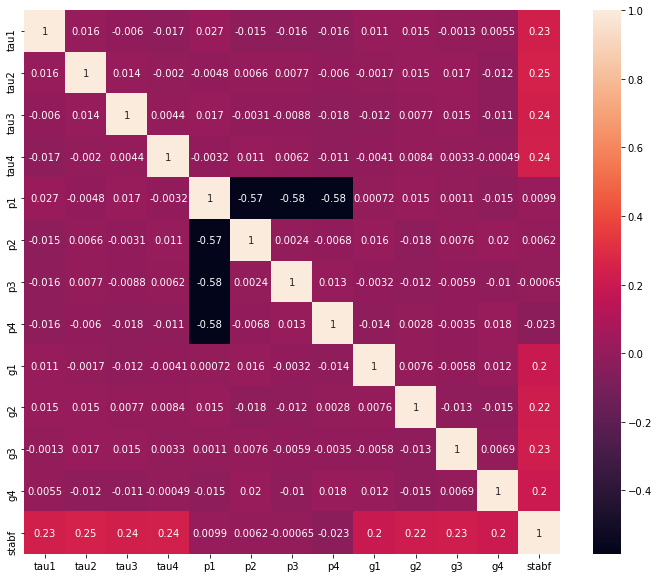

In [18]:
#checking correlations between columns
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df.corr(), annot = True)

In [16]:
# Set up X and y variables
target_variable = df['stabf']
features = df.drop(columns='stabf')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A54875A3A0>,
      dtype=object)

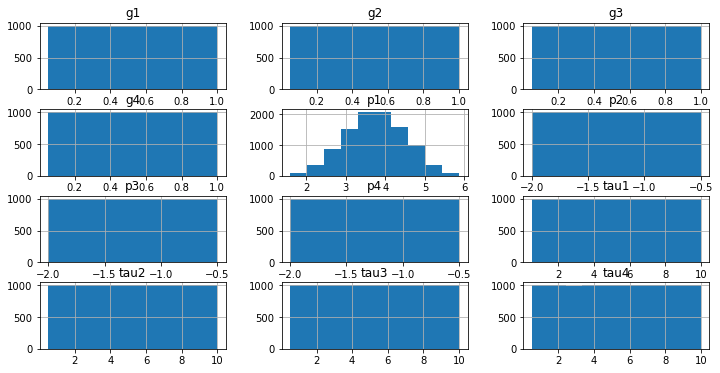

In [17]:
features.hist(figsize=(12, 6))

In [18]:
#Scaling Features using Standard scaler
X = features
Y = target_variable

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = features.columns)


### Model Development


In [19]:
#Splitting Dataset into training and testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

### Fitting Model with Logistics Regression

In [20]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear', random_state = 1).fit(X_train, Y_train)

In [21]:
#A function to return error metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(Y_true, Y_pred, label):
    return pd.Series({'accuracy':accuracy_score(Y_true, Y_pred),
                      'precision': precision_score(Y_true, Y_pred),
                      'recall': recall_score(Y_true, Y_pred),
                      'f1': f1_score(Y_true, Y_pred)},
                      name=label)

In [22]:
# The error on the training and test data sets
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

train_test_full_error = pd.concat([measure_error(Y_train, Y_train_pred, 'train'),
                              measure_error(Y_test, Y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.820250,0.804000
precision,0.843550,0.836336
recall,0.880990,0.864907
f1,0.861864,0.850382


Text(0.5, 87.0, 'Ground Truth')

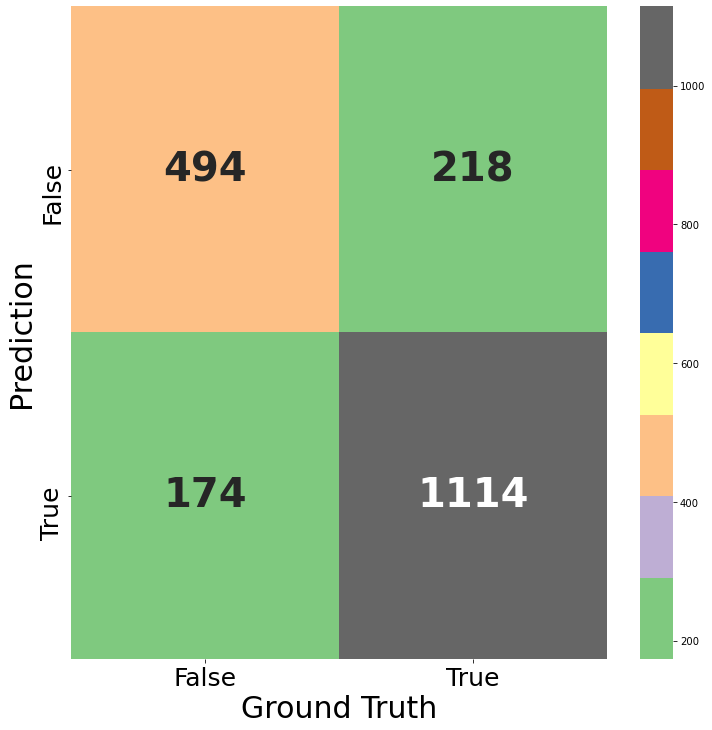

In [23]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

sns.color_palette("viridis")
sns.set_palette(sns.color_palette("viridis"))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', cmap= 'Accent', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

### Fitting Model Using Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(X_train, Y_train)

In [25]:
#The number of nodes and the maximum actual depth
dt.tree_.node_count, dt.tree_.max_depth

(1253, 17)

In [26]:
#Using grid search with cross validation, find a decision tree that performs well on the test data set

from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': ['auto', 'sqrt', 'log2', None]}

GR = GridSearchCV(DecisionTreeClassifier(random_state=1),
                  param_grid = param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, Y_train)

In [27]:
#The number of nodes and the maximum depth of the tree.
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(623, 9)

In [28]:

Y_train_pred_gr = GR.predict(X_train)
Y_test_pred_gr = GR.predict(X_test)
train_test_full_error = pd.concat([measure_error(Y_train, Y_train_pred_gr, 'train'),
                              measure_error(Y_test, Y_test_pred_gr, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.953250,0.860500
precision,0.959844,0.891389
recall,0.967007,0.892081
f1,0.963412,0.891735


Text(0.5, 87.0, 'Ground Truth')

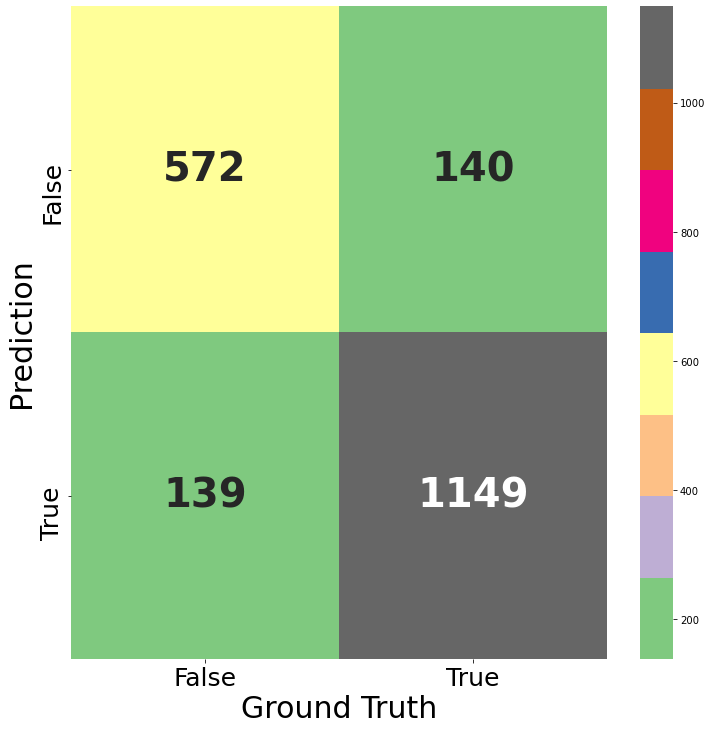

In [29]:
# confusion matrix
from sklearn.metrics import confusion_matrix

sns.color_palette("viridis")
sns.set_palette(sns.color_palette("viridis"))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(Y_test, Y_test_pred_gr), annot=True, fmt='d', cmap= 'Accent', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

### Fitting Model Using Random Forest

In [30]:
### BEGIN SOLUTION
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(random_state=1)
rf = rf.fit(X_train, Y_train)

In [31]:
# The parameters to be fit
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
# The grid search object
GV_GBC = GridSearchCV(RandomForestClassifier(random_state=1), 
                      param_grid= hyperparameter_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, Y_train)

In [32]:
GV_GBC.best_estimator_

RandomForestClassifier(n_estimators=500, random_state=1)

In [33]:
Y_train_pred_GV_GBC = GV_GBC.predict(X_train)
Y_test_pred_GV_GBC =GV_GBC.predict(X_test)
train_test_full_error = pd.concat([measure_error(Y_train,Y_train_pred_GV_GBC, 'train'),
                              measure_error(Y_test, Y_test_pred_GV_GBC, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.922500
precision,1.0,0.929492
recall,1.0,0.951863
f1,1.0,0.940545


Text(0.5, 87.0, 'Ground Truth')

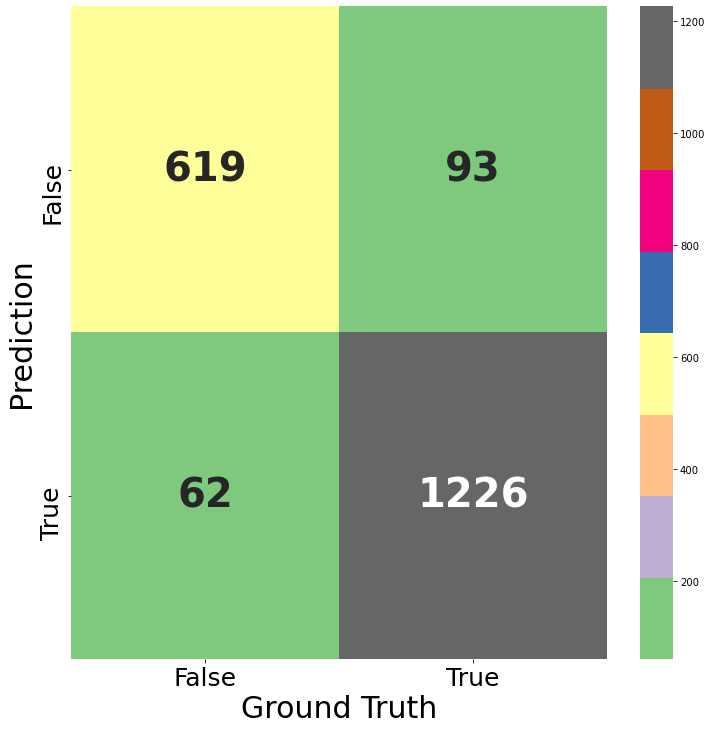

In [34]:
sns.color_palette("viridis")
sns.set_palette(sns.color_palette("viridis"))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(Y_test, Y_test_pred_GV_GBC), annot=True, fmt='d', cmap= 'Accent', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

### Fitting Model using ExtraTree Classifier

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
et =  ExtraTreesClassifier(random_state=1)
et = et.fit(X_train, Y_train)

In [36]:
#Cross Validation

# The parameters to be fit
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
# The grid search object
GV_GBC = GridSearchCV(ExtraTreesClassifier(random_state=1), 
                      param_grid= hyperparameter_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_ET = GV_GBC.fit(X_train, Y_train)

In [37]:
GV_ET.best_estimator_

ExtraTreesClassifier(min_samples_split=5, n_estimators=1000, random_state=1)

In [38]:
Y_train_pred_GV_ET = GV_ET.predict(X_train)
Y_test_pred_GV_ET =GV_ET.predict(X_test)
train_test_full_error = pd.concat([measure_error(Y_train,Y_train_pred_GV_ET, 'train'),
                              measure_error(Y_test, Y_test_pred_GV_ET, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.935500
precision,1.0,0.917808
recall,1.0,0.988354
f1,1.0,0.951776


Text(0.5, 51.0, 'Ground Truth')

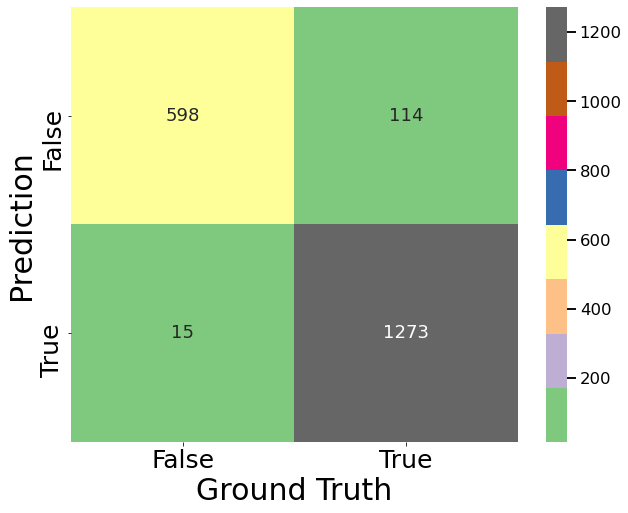

In [39]:

_, ax = plt.subplots(figsize=(10,8))
sns.set_context('talk')
cm = confusion_matrix(Y_test, Y_test_pred_GV_ET)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Accent')
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

### Fitting Model Using Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9))

param_grid = {'n_estimators': [50, 100, 300, 500, 1000],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, Y_train)

In [41]:
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                   learning_rate=0.01, n_estimators=1000)

In [42]:

Y_train_pred_GV_ABC = GV_ABC.predict(X_train)
Y_test_pred_GV_ABC =GV_ABC.predict(X_test)
train_test_full_error = pd.concat([measure_error(Y_train,Y_train_pred_GV_ABC, 'train'),
                              measure_error(Y_test, Y_test_pred_GV_ABC, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.918500
precision,1.0,0.915743
recall,1.0,0.961957
f1,1.0,0.938281


Text(0.5, 40.5, 'Ground Truth')

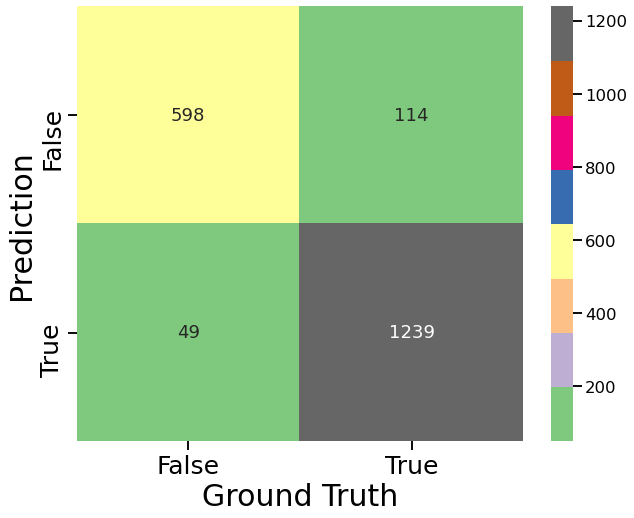

In [43]:
_, ax = plt.subplots(figsize=(10,8))
sns.set_context('talk')
cm = confusion_matrix(Y_test, Y_test_pred_GV_ABC)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Accent')
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

#### In summary, the best model fit is ExtraTreesClassifier(min_samples_split=5, n_estimators=1000, random_state=1)

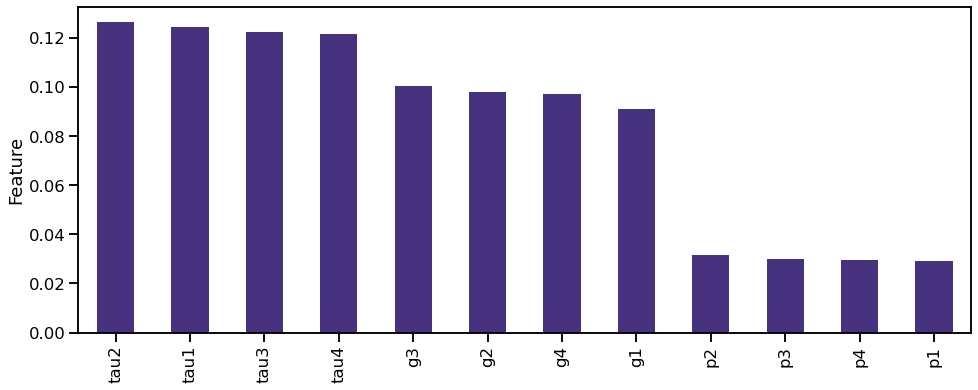

In [44]:
#Checking feature importance

feature_imp = pd.Series(rf.feature_importances_, index=features.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

In [47]:
#Summary Error results

List = [['accuracy',0.8040, 0.8605, 0.9225, 0.9355,0.9185],['precision',0.8363,0.8914,0.9295,0.9178,0.9157,],['recall',0.8649,0.8921,0.9519,0.9884,0.9620],['f1 score',0.8504,0.8917,0.9405,0.9518,0.9383]]

In [49]:
df = pd.DataFrame(List, columns = ['Error_matrix','Logistics Classifier','DecisionTree Classifier','RandomForest Classifier','ExtraTree Classifier','Adaboost Classifier'])

In [50]:
df

,Error_matrix,Logistics Classifier,DecisionTree Classifier,RandomForest Classifier,ExtraTree Classifier,Adaboost Classifier
0,accuracy,0.8040,0.8605,0.9225,0.9355,0.9185
1,precision,0.8363,0.8914,0.9295,0.9178,0.9157
2,recall,0.8649,0.8921,0.9519,0.9884,0.9620
3,f1 score,0.8504,0.8917,0.9405,0.9518,0.9383
